<font color=purple > _**Emily Nordhoff - 2022**_ </font>

# Sourcing & Analyzing Time Series

This script contains a time series analysis using pitch and hit variables from all balls in play in the MLB 
2021 season. Data was gathered from BaseballSavant.com.

### Contents

    1. Importing data and libraries
    2. Subsetting and wrangling time series data
    3. Time series analysis: decomposition
    4. Testing for stationarity
    5. Stationarizing

## 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('seaborn') 

In [2]:
path = r'/Users/Emily/Documents/CF Data Analysis Program/Immersion 6/Hits Analysis/'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 data','prepared data','bip_ballparks_merged_gis.pkl'))

In [4]:
df.head()

,pitch_type,game_date,release_speed,player_name,batter,pitcher,events,zone,stand,p_throws,...,batter_home_away,contact,runner_1b,runner_2b,runner_3b,scoring_play,Latitude,Longitude,park_city,park_state
0,FC,2021-04-30,82.7,"Altuve, Jose",514888,642232,field_out,4.0,R,L,...,away,Under,NaN,NaN,NaN,False,27.768284,-82.653961,St. Petersburg,Florida
1,FC,2021-04-30,82.4,"Maldonado, Martín",455117,642232,field_out,8.0,R,L,...,away,Flare/Burner,NaN,NaN,NaN,False,27.768284,-82.653961,St. Petersburg,Florida
2,CH,2021-04-30,83.8,"Kiermaier, Kevin",595281,621121,field_out,5.0,L,R,...,home,Under,NaN,NaN,NaN,False,27.768284,-82.653961,St. Petersburg,Florida
3,FC,2021-04-30,82.7,"Straw, Myles",664702,642232,field_out,13.0,R,L,...,away,Under,NaN,NaN,NaN,False,27.768284,-82.653961,St. Petersburg,Florida
4,SL,2021-04-30,88.0,"Díaz, Yandy",650490,621121,field_out,8.0,R,R,...,home,Barrel,NaN,1.0,NaN,False,27.768284,-82.653961,St. Petersburg,Florida


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121707 entries, 0 to 121706
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   pitch_type             121654 non-null  object 
 1   game_date              121707 non-null  object 
 2   release_speed          121653 non-null  float64
 3   player_name            121707 non-null  object 
 4   batter                 121707 non-null  int64  
 5   pitcher                121707 non-null  int64  
 6   events                 121707 non-null  object 
 7   zone                   121654 non-null  float64
 8   stand                  121707 non-null  object 
 9   p_throws               121707 non-null  object 
 10  home_team              121707 non-null  object 
 11  away_team              121707 non-null  object 
 12  hit_location           115340 non-null  float64
 13  bb_type                121703 non-null  object 
 14  balls                  121707 non-nu

In [17]:
df['bb_type'].value_counts()

ground_ball    53417
fly_ball       31195
line_drive     28720
popup           8371
Name: bb_type, dtype: int64

In [34]:
df['contact'].value_counts()

Topped           38465
Under            30574
Flare/Burner     29218
Barrel            9638
Solid Contact     7441
Weak              5985
0                  386
Name: contact, dtype: int64

In [35]:
df['contact'].value_counts()['Barrel']/df['contact'].value_counts().sum()

0.07919018626701833

## 2. Subsetting & wrangling time series data

The two players named Rookie of the Year (one for American League and one for National League) were: Jonathan India (Reds) and Randy Arozarena (Rays). Arozarena had his MLB debut in 2020, so I'm going to focus this analysis on India because it was truly his first MLB season.

In [6]:
# create a datetime format variable

from datetime import datetime

df['datetime'] = pd.to_datetime(df['game_date'])

In [7]:
hits = ['single', 'double', 'triple', 'home_run']

In [8]:
sea = df.loc[df['batter_team'] == 'SEA']
sea_dist = sea[['datetime','hit_distance_sc']].groupby(pd.Grouper(key='datetime', freq='W')).mean()

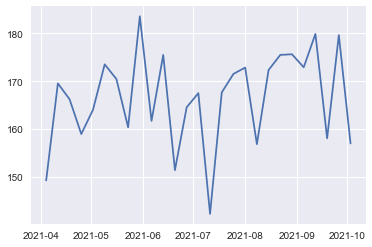

In [9]:
plt.plot(sea_dist)

In [51]:
atl = df.loc[df['batter_team'] == 'ATL']
atl_dist = atl[['datetime','hit_distance_sc']].groupby(pd.Grouper(key='datetime', freq='D')).mean()

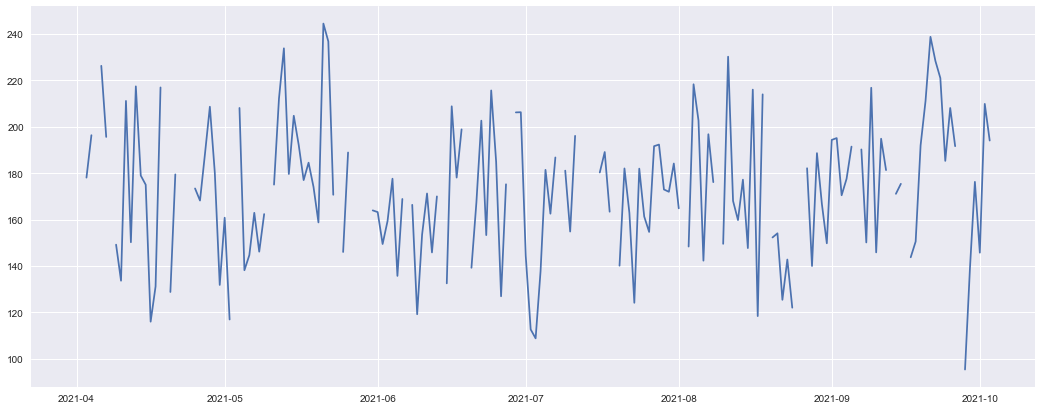

In [52]:
plt.plot(atl_dist)

In [59]:
decomposition = sm.tsa.seasonal_decompose(sea_dist, model='additive', period=4)

In [54]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

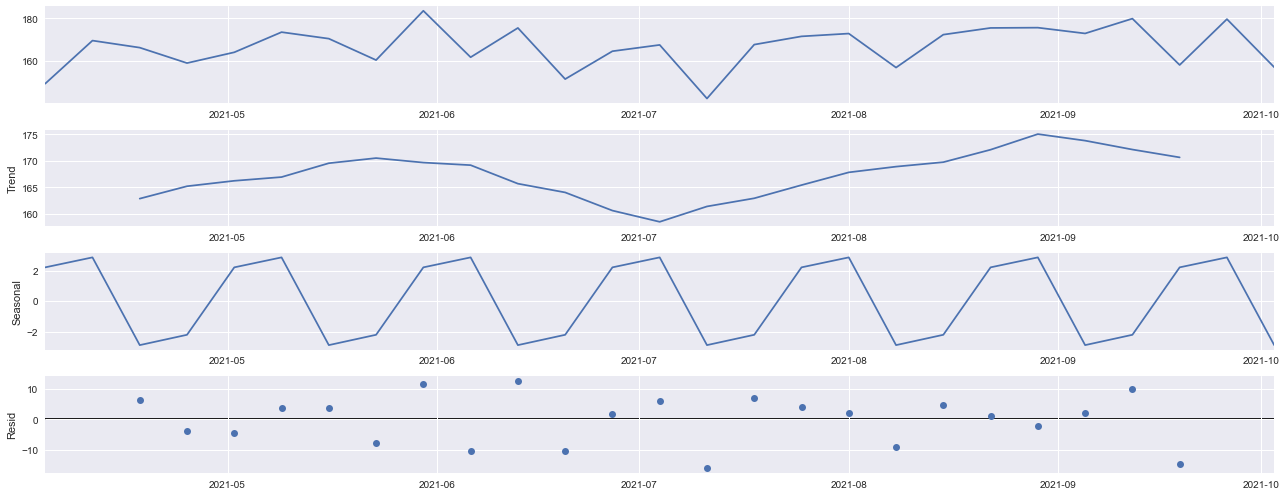

In [60]:
# Plot the separate components

decomposition.plot()
plt.show()

In [42]:
contact = df.groupby([pd.Grouper(key='datetime', freq='W'),'contact']).size().reset_index(name='count')
contact

,datetime,contact,count
0,2021-04-04,0,6
1,2021-04-04,Barrel,188
2,2021-04-04,Flare/Burner,506
3,2021-04-04,Solid Contact,157
4,2021-04-04,Topped,713
...,...,...,...
184,2021-10-03,Flare/Burner,1179
185,2021-10-03,Solid Contact,281
186,2021-10-03,Topped,1435
187,2021-10-03,Under,1205


In [43]:
contact['total'] = contact.groupby('datetime')['count'].transform('sum')
contact

,datetime,contact,count,total
0,2021-04-04,0,6,2247
1,2021-04-04,Barrel,188,2247
2,2021-04-04,Flare/Burner,506,2247
3,2021-04-04,Solid Contact,157,2247
4,2021-04-04,Topped,713,2247
...,...,...,...,...
184,2021-10-03,Flare/Burner,1179,4698
185,2021-10-03,Solid Contact,281,4698
186,2021-10-03,Topped,1435,4698
187,2021-10-03,Under,1205,4698


In [44]:
contact = contact.loc[contact['contact'] == 'Barrel']
contact

,datetime,contact,count,total
1,2021-04-04,Barrel,188,2247
8,2021-04-11,Barrel,373,4299
15,2021-04-18,Barrel,365,4574
22,2021-04-25,Barrel,385,4284
29,2021-05-02,Barrel,369,4703
36,2021-05-09,Barrel,366,4626
43,2021-05-16,Barrel,372,4658
50,2021-05-23,Barrel,399,4711
57,2021-05-30,Barrel,311,4294
64,2021-06-06,Barrel,387,4814


In [45]:
contact['percent'] = contact['count']/contact['total']
contact.drop(columns=['contact', 'count', 'total'], inplace=True)
contact.reset_index(drop=True)

,datetime,percent
0,2021-04-04,0.083667
1,2021-04-11,0.086764
2,2021-04-18,0.079799
3,2021-04-25,0.089869
4,2021-05-02,0.078461
5,2021-05-09,0.079118
6,2021-05-16,0.079863
7,2021-05-23,0.084695
8,2021-05-30,0.072427
9,2021-06-06,0.080391


In [47]:
contact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 183
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  27 non-null     datetime64[ns]
 1   percent   27 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 648.0 bytes


<AxesSubplot:xlabel='datetime', ylabel='percent'>

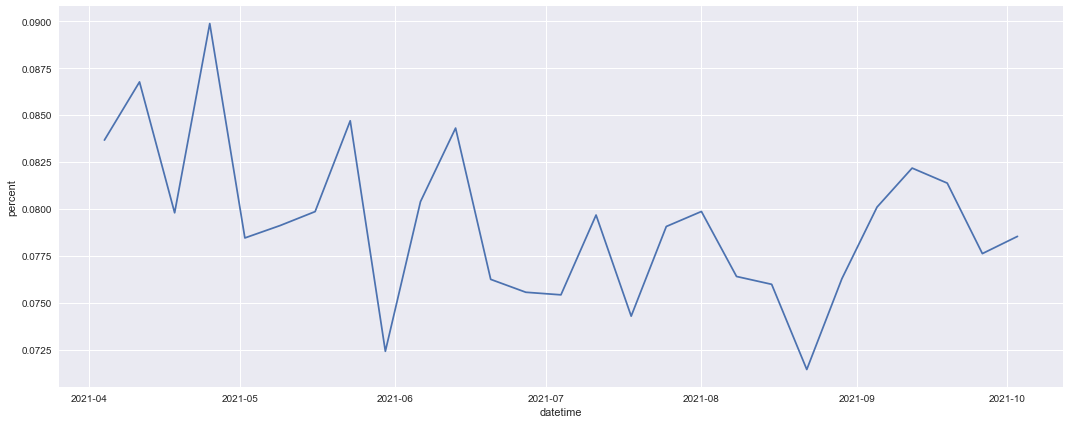

In [50]:
sns.lineplot(data=contact, x='datetime', y='percent')

In [ ]:
barrels[['datetime','contact','']].groupby(pd.Grouper(key='datetime', freq='W')).agg({'contact':'count'})

In [8]:
# subset all the balls hit in play by Jonathan India

ji = df[['datetime', 'launch_speed']].loc[df['player_name'] == 'India, Jonathan']
ji.shape

(396, 2)

In [9]:
# look for missing values

ji.isnull().sum()

datetime        0
launch_speed    0
dtype: int64

In [10]:
# look for duplicates (and found some)

ji.duplicated().sum()

2

In [11]:
ji[ji.duplicated()]

,datetime,launch_speed
42837,2021-08-26,101.0
72682,2021-09-10,77.3


In [12]:
# not actually duplicates! Each of these balls hit in play are different

df.loc[(df['datetime'] == '2021-08-26') & (df['player_name'] == 'India, Jonathan')]

,pitch_type,game_date,release_speed,player_name,batter,pitcher,events,zone,stand,p_throws,...,contact,runner_1b,runner_2b,runner_3b,scoring_play,Latitude,Longitude,park_city,park_state,datetime
42813,CH,2021-08-26,81.7,"India, Jonathan",663697,474463,grounded_into_double_play,5.0,R,L,...,Topped,1.0,NaN,NaN,False,43.027954,-87.971497,Milwaukee,Wisconsin,2021-08-26
42826,FF,2021-08-26,95.5,"India, Jonathan",663697,519326,home_run,8.0,R,R,...,Barrel,1.0,NaN,1.0,True,43.027954,-87.971497,Milwaukee,Wisconsin,2021-08-26
42837,SI,2021-08-26,89.3,"India, Jonathan",663697,474463,single,5.0,R,L,...,Flare/Burner,NaN,NaN,NaN,False,43.027954,-87.971497,Milwaukee,Wisconsin,2021-08-26
42841,CH,2021-08-26,79.4,"India, Jonathan",663697,571948,field_out,9.0,R,L,...,Under,NaN,NaN,NaN,False,43.027954,-87.971497,Milwaukee,Wisconsin,2021-08-26


In [13]:
# no dups on this day either.

df.loc[(df['datetime'] == '2021-09-10') & (df['player_name'] == 'India, Jonathan')]

,pitch_type,game_date,release_speed,player_name,batter,pitcher,events,zone,stand,p_throws,...,contact,runner_1b,runner_2b,runner_3b,scoring_play,Latitude,Longitude,park_city,park_state,datetime
72656,SI,2021-09-10,86.4,"India, Jonathan",663697,452657,field_out,5.0,R,L,...,Topped,NaN,NaN,NaN,False,38.62278,-90.193329,St. Louis,Missouri,2021-09-10
72682,SI,2021-09-10,98.4,"India, Jonathan",663697,472610,field_out,8.0,R,R,...,Topped,NaN,NaN,NaN,False,38.62278,-90.193329,St. Louis,Missouri,2021-09-10
72687,CH,2021-09-10,81.5,"India, Jonathan",663697,452657,field_out,14.0,R,L,...,Weak,NaN,NaN,NaN,False,38.62278,-90.193329,St. Louis,Missouri,2021-09-10


In [14]:
ji = ji.set_index('datetime') # Set the datetime as the index of the dataframe.
ji.sort_index(inplace=True)
ji.head()

,launch_speed
datetime,
2021-04-01,109.7
2021-04-01,92.7
2021-04-01,89.6
2021-04-03,95.4
2021-04-03,65.3


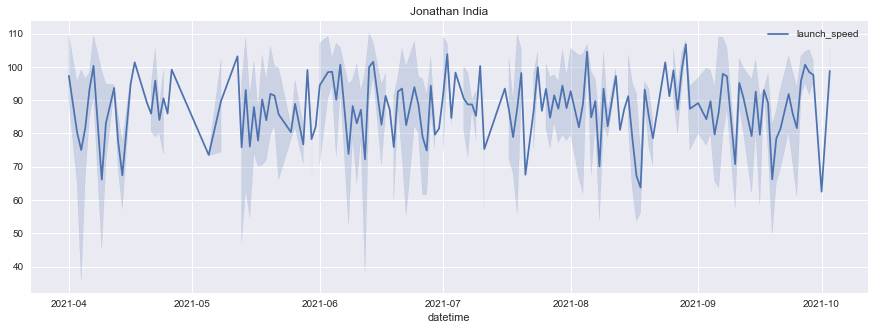

In [15]:
# Lineplot of the launch speed off the bat by Jonathan India over the whole season

plt.figure(figsize=(15,5)) 
sns.lineplot(data=ji)
plt.title('Jonathan India')
plt.show()

In [52]:
# subset all the balls hit in play by Randy Arozarena

ra = df[['datetime', 'launch_speed']].loc[df['player_name'] == 'Arozarena, Randy']
ra.shape

(364, 2)

In [55]:
ra = ra.sort_values(by='datetime').reset_index(drop=True)
ra.head(15)

,datetime,launch_speed
0,2021-04-01,104.0
1,2021-04-01,94.0
2,2021-04-01,100.5
3,2021-04-02,70.1
4,2021-04-02,87.9
5,2021-04-02,109.7
6,2021-04-05,75.6
7,2021-04-05,100.7
8,2021-04-06,71.6
9,2021-04-06,95.8


In [61]:
ra['launch_speed'].iloc[0:6].mean()

94.36666666666667

In [69]:
ra_weekly = ra.groupby(pd.Grouper(key='datetime', axis=0, freq='4D')).mean()
ra_weekly

,launch_speed
datetime,
2021-04-01,94.366667
2021-04-05,89.728571
2021-04-09,88.100000
2021-04-13,92.383333
2021-04-17,88.083333
2021-04-21,98.583333
2021-04-25,92.477778
2021-04-29,86.700000
2021-05-03,96.950000


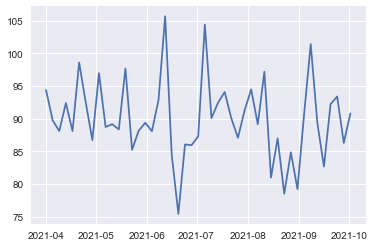

In [70]:
plt.plot(ra_weekly)

In [71]:
ra_weekly.isnull().sum()

launch_speed    0
dtype: int64

In [18]:
ra = ra.set_index('datetime') # Set the datetime as the index of the dataframe.
ra.sort_index(inplace=True)
ra.head()

,launch_speed
datetime,
2021-04-01,104.0
2021-04-01,94.0
2021-04-01,100.5
2021-04-02,70.1
2021-04-02,87.9


In [19]:
ra.isnull().sum()

launch_speed    4
dtype: int64

In [20]:
# drop the records that the launch speed is missing

ra.dropna(subset=['launch_speed'], inplace=True)

In [21]:
# no dups here

ra.duplicated().sum()

107

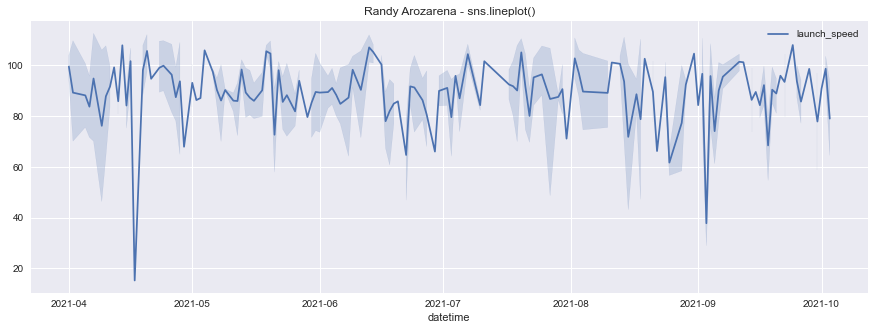

In [22]:
# Lineplot of the launch speed off the bat by Randy Arozarena over the whole season

plt.figure(figsize=(15,5)) 
sns.lineplot(data=ra)
plt.title('Randy Arozarena - sns.lineplot()')
plt.show()

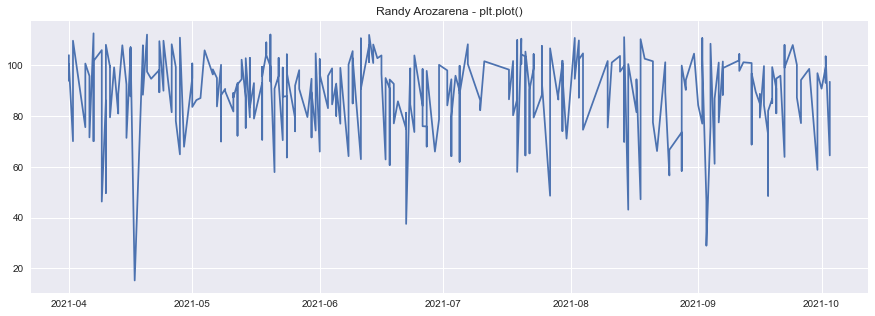

In [23]:
plt.figure(figsize=(15,5)) 
plt.plot(ra)
plt.title('Randy Arozarena - plt.plot()')
plt.show()

## 3. Time series analysis: decomposition

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(ji, model='additive', period)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None